# Baseline K-Means

Here, Baseline K-means is implemented on the ARMBench Dataset Images. The Silhoutte Scores are obtained and plotted against the number of clusters to help obtain an optimal value for K (Number of clusters)

Before implementing K-means, the necessary libraries are imported

In [1]:
pip install tensorflow numpy pandas scikit-learn scikit-image #Install necessary libraries and packages

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np #import necessary libraries
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    silhouette_score,
)
import matplotlib.pyplot as plt


In [3]:
pip install timm

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
from skimage.io import imread, imsave
from skimage.transform import resize
from tqdm import tqdm
import time
import numpy as np
import pandas as pd

def load_images(image_dir, df, target_size=(64, 64), num_images=50000, save_dir=None): #load and preprocess images to a size of 64x64
    image_list = []
    labels = []
    count = 0  

    folder_names = sorted(os.listdir(image_dir))

    if save_dir:
        images_filename = os.path.join(save_dir, "images.npy")
        labels_filename = os.path.join(save_dir, "labels.npy")

        if os.path.exists(images_filename) and os.path.exists(labels_filename):
            print("Loading images and labels from saved files...")
            image_list = np.load(images_filename, allow_pickle=True)
            labels = np.load(labels_filename, allow_pickle=True)
            return image_list, labels

    progress_bar = tqdm(total=num_images, desc="Loading images", unit="image")

    start_time = time.time() 

    for folder_name in folder_names:
        folder_path = os.path.join(image_dir, folder_name)

        if os.path.isdir(folder_path):
            image_files = [f for f in os.listdir(folder_path) if f.lower().endswith('.jpg')] #only jpg files from the folders are uploaded

            if len(image_files) > 0:
                pick_rgb_file = os.path.join(folder_path, "PickRGB.jpg") #Among the jpg files, PickRGB file is chosen if it is present
                image_file = pick_rgb_file if os.path.exists(pick_rgb_file) else image_files[0] #Else any other jpg file is chosen

                image_path = os.path.join(folder_path, image_file)
                img = imread(image_path)
                img = resize(img, target_size, mode='reflect')
                image_list.append(img)
                labels.append(df.loc[count, 'Container']) 
                count += 1

    
                progress_bar.update(1)

                if count == num_images:
               
                    progress_bar.close()

             
                    if save_dir:
                        print("Saving images and labels...")
                        os.makedirs(save_dir, exist_ok=True)
                        np.save(os.path.join(save_dir, "images.npy"), np.array(image_list))
                        np.save(os.path.join(save_dir, "labels.npy"), np.array(labels))

                  
                    elapsed_time = time.time() - start_time
                    time_per_image = elapsed_time / num_images
                    time_left = (num_images - count) * time_per_image
                    print(f"Time left: {time_left:.2f} seconds")

                    return np.array(image_list), labels


    progress_bar.close()


    if save_dir:
        print("Saving images and labels...")
        os.makedirs(save_dir, exist_ok=True)
        np.save(os.path.join(save_dir, "images.npy"), np.array(image_list)) #save the preprocessed images and labels
        np.save(os.path.join(save_dir, "labels.npy"), np.array(labels))


    elapsed_time = time.time() - start_time
    time_per_image = elapsed_time / count
    time_left = (num_images - count) * time_per_image
    print(f"Time left: {time_left:.2f} seconds")

    return np.array(image_list), labels

C:\Users\sahre\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [4]:
def load_saved_images_labels(load_dir): #get images and corresponding labels
    images_filename = os.path.join(load_dir, "images.npy")
    labels_filename = os.path.join(load_dir, "labels.npy")

    image_list = np.load(images_filename, allow_pickle=True)
    labels = np.load(labels_filename, allow_pickle=True)

    return image_list, labels


load_dir = 'D:/Down/processedimages'
images, labels = load_saved_images_labels(load_dir)

The Images are first flattened before clustering. The cluster range is defined from 2 to 10. While iterating over the cluster range, the silhoutte scores are obtained and stored in a list. These are plotted against the number of clusters using Matplotlib.

C:\Users\sahre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sahre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sahre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sahre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sahre\anaconda3\Lib\site-packages\sklearn\clust

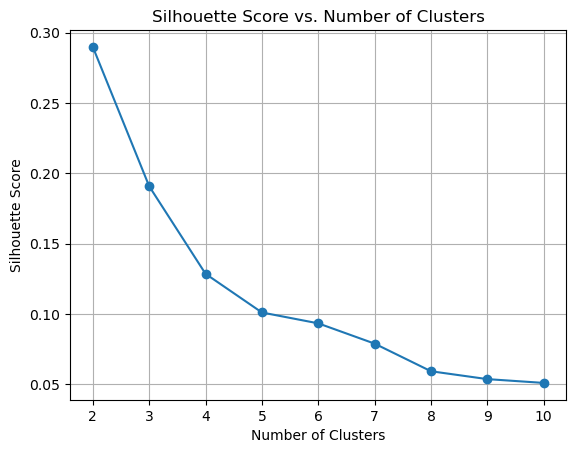

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


n_samples = len(images)
images_flattened = images.reshape(n_samples, -1)

cluster_range = range(2, 11) #cluster numbers are defined from 2 to 10

silhouette_scores = []

for num_clusters in cluster_range: #Silhoutte Score is stored in a list for all cluster numbers
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(images_flattened)
    silhouette_avg = silhouette_score(images_flattened, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(cluster_range, silhouette_scores, marker='o') #The graph is plotted
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()
